In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv')

/var/folders/12/drwhxkys103f4ccwb4rzd17h0000gn/T/ipykernel_3410/236255314.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv')


In [3]:
df.columns = df.columns.str.strip()  #kolon adında boşluk vs. varsa kaldırır.

df.head(10)

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid
0,02/01/2022 12:00:00 AM,H007,1 Av (L),M,L,metrocard,62,1,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T00:00:00H0071 Av (L)MLmetrocard
1,02/01/2022 01:00:00 AM,H007,1 Av (L),M,L,metrocard,14,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T01:00:00H0071 Av (L)MLmetrocard
2,02/01/2022 02:00:00 AM,H007,1 Av (L),M,L,metrocard,19,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T02:00:00H0071 Av (L)MLmetrocard
3,02/01/2022 03:00:00 AM,H007,1 Av (L),M,L,metrocard,7,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T03:00:00H0071 Av (L)MLmetrocard
4,02/01/2022 04:00:00 AM,H007,1 Av (L),M,L,metrocard,13,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T04:00:00H0071 Av (L)MLmetrocard
5,02/01/2022 05:00:00 AM,H007,1 Av (L),M,L,metrocard,38,2,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T05:00:00H0071 Av (L)MLmetrocard
6,02/01/2022 06:00:00 AM,H007,1 Av (L),M,L,metrocard,141,3,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T06:00:00H0071 Av (L)MLmetrocard
7,02/01/2022 07:00:00 AM,H007,1 Av (L),M,L,metrocard,345,6,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T07:00:00H0071 Av (L)MLmetrocard
8,02/01/2022 08:00:00 AM,H007,1 Av (L),M,L,metrocard,534,17,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T08:00:00H0071 Av (L)MLmetrocard
9,02/01/2022 09:00:00 AM,H007,1 Av (L),M,L,metrocard,350,5,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T09:00:00H0071 Av (L)MLmetrocard


In [4]:
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])

# 'Tarih' ve 'saat' bileşenlerini ayrı sütunlara çıkardım
df['date'] = df['transit_timestamp'].dt.date
df['time'] = df['transit_timestamp'].dt.time

df.head(10)

/var/folders/12/drwhxkys103f4ccwb4rzd17h0000gn/T/ipykernel_3410/3275056146.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])


,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid,date,time
0,2022-02-01 00:00:00,H007,1 Av (L),M,L,metrocard,62,1,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T00:00:00H0071 Av (L)MLmetrocard,2022-02-01,00:00:00
1,2022-02-01 01:00:00,H007,1 Av (L),M,L,metrocard,14,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T01:00:00H0071 Av (L)MLmetrocard,2022-02-01,01:00:00
2,2022-02-01 02:00:00,H007,1 Av (L),M,L,metrocard,19,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T02:00:00H0071 Av (L)MLmetrocard,2022-02-01,02:00:00
3,2022-02-01 03:00:00,H007,1 Av (L),M,L,metrocard,7,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T03:00:00H0071 Av (L)MLmetrocard,2022-02-01,03:00:00
4,2022-02-01 04:00:00,H007,1 Av (L),M,L,metrocard,13,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T04:00:00H0071 Av (L)MLmetrocard,2022-02-01,04:00:00
5,2022-02-01 05:00:00,H007,1 Av (L),M,L,metrocard,38,2,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T05:00:00H0071 Av (L)MLmetrocard,2022-02-01,05:00:00
6,2022-02-01 06:00:00,H007,1 Av (L),M,L,metrocard,141,3,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T06:00:00H0071 Av (L)MLmetrocard,2022-02-01,06:00:00
7,2022-02-01 07:00:00,H007,1 Av (L),M,L,metrocard,345,6,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T07:00:00H0071 Av (L)MLmetrocard,2022-02-01,07:00:00
8,2022-02-01 08:00:00,H007,1 Av (L),M,L,metrocard,534,17,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T08:00:00H0071 Av (L)MLmetrocard,2022-02-01,08:00:00
9,2022-02-01 09:00:00,H007,1 Av (L),M,L,metrocard,350,5,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T09:00:00H0071 Av (L)MLmetrocard,2022-02-01,09:00:00


In [5]:
df['dayname'] = pd.to_datetime(df['date']).dt.day_name()
df.head(10)

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid,date,time,dayname
0,2022-02-01 00:00:00,H007,1 Av (L),M,L,metrocard,62,1,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T00:00:00H0071 Av (L)MLmetrocard,2022-02-01,00:00:00,Tuesday
1,2022-02-01 01:00:00,H007,1 Av (L),M,L,metrocard,14,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T01:00:00H0071 Av (L)MLmetrocard,2022-02-01,01:00:00,Tuesday
2,2022-02-01 02:00:00,H007,1 Av (L),M,L,metrocard,19,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T02:00:00H0071 Av (L)MLmetrocard,2022-02-01,02:00:00,Tuesday
3,2022-02-01 03:00:00,H007,1 Av (L),M,L,metrocard,7,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T03:00:00H0071 Av (L)MLmetrocard,2022-02-01,03:00:00,Tuesday
4,2022-02-01 04:00:00,H007,1 Av (L),M,L,metrocard,13,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T04:00:00H0071 Av (L)MLmetrocard,2022-02-01,04:00:00,Tuesday
5,2022-02-01 05:00:00,H007,1 Av (L),M,L,metrocard,38,2,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T05:00:00H0071 Av (L)MLmetrocard,2022-02-01,05:00:00,Tuesday
6,2022-02-01 06:00:00,H007,1 Av (L),M,L,metrocard,141,3,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T06:00:00H0071 Av (L)MLmetrocard,2022-02-01,06:00:00,Tuesday
7,2022-02-01 07:00:00,H007,1 Av (L),M,L,metrocard,345,6,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T07:00:00H0071 Av (L)MLmetrocard,2022-02-01,07:00:00,Tuesday
8,2022-02-01 08:00:00,H007,1 Av (L),M,L,metrocard,534,17,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T08:00:00H0071 Av (L)MLmetrocard,2022-02-01,08:00:00,Tuesday
9,2022-02-01 09:00:00,H007,1 Av (L),M,L,metrocard,350,5,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T09:00:00H0071 Av (L)MLmetrocard,2022-02-01,09:00:00,Tuesday


In [6]:
df.sort_values(["station_complex","transit_timestamp"], inplace=True, ascending=True)
df.head(10)
     

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid,date,time,dayname
0,2022-02-01 00:00:00,H007,1 Av (L),M,L,metrocard,62,1,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T00:00:00H0071 Av (L)MLmetrocard,2022-02-01,00:00:00,Tuesday
1,2022-02-01 01:00:00,H007,1 Av (L),M,L,metrocard,14,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T01:00:00H0071 Av (L)MLmetrocard,2022-02-01,01:00:00,Tuesday
2,2022-02-01 02:00:00,H007,1 Av (L),M,L,metrocard,19,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T02:00:00H0071 Av (L)MLmetrocard,2022-02-01,02:00:00,Tuesday
3,2022-02-01 03:00:00,H007,1 Av (L),M,L,metrocard,7,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T03:00:00H0071 Av (L)MLmetrocard,2022-02-01,03:00:00,Tuesday
4,2022-02-01 04:00:00,H007,1 Av (L),M,L,metrocard,13,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T04:00:00H0071 Av (L)MLmetrocard,2022-02-01,04:00:00,Tuesday
5,2022-02-01 05:00:00,H007,1 Av (L),M,L,metrocard,38,2,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T05:00:00H0071 Av (L)MLmetrocard,2022-02-01,05:00:00,Tuesday
6,2022-02-01 06:00:00,H007,1 Av (L),M,L,metrocard,141,3,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T06:00:00H0071 Av (L)MLmetrocard,2022-02-01,06:00:00,Tuesday
7,2022-02-01 07:00:00,H007,1 Av (L),M,L,metrocard,345,6,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T07:00:00H0071 Av (L)MLmetrocard,2022-02-01,07:00:00,Tuesday
8,2022-02-01 08:00:00,H007,1 Av (L),M,L,metrocard,534,17,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T08:00:00H0071 Av (L)MLmetrocard,2022-02-01,08:00:00,Tuesday
9,2022-02-01 09:00:00,H007,1 Av (L),M,L,metrocard,350,5,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-02-01T09:00:00H0071 Av (L)MLmetrocard,2022-02-01,09:00:00,Tuesday


In [7]:
(df['ridership'] < 0).sum()

0

In [8]:
# En çok ziyaret edilen 10 istasyon
_stations = df.groupby('station_complex').agg({'ridership': 'sum'}).sort_values('ridership', ascending=False).reset_index().head(10)

_stations.head(10)
# Assuming you have a numeric column named 'ridership_column' in your DataFrame


,station_complex,ridership
0,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",81846603
1,"Grand Central-42 St (S,4,5,6,7)",44598567
2,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",37053954
3,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",32691527
4,"Fulton St (A,C,J,Z,2,3,4,5)",27411091
5,"34 St-Penn Station (A,C,E)",26169445
6,"59 St-Columbus Circle (A,B,C,D,1)",24604258
7,"34 St-Penn Station (1,2,3)",24092620
8,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",21598870
9,Flushing-Main St (7),21432327


Text(0.5, 1.0, 'TOP 10 STATIONS')

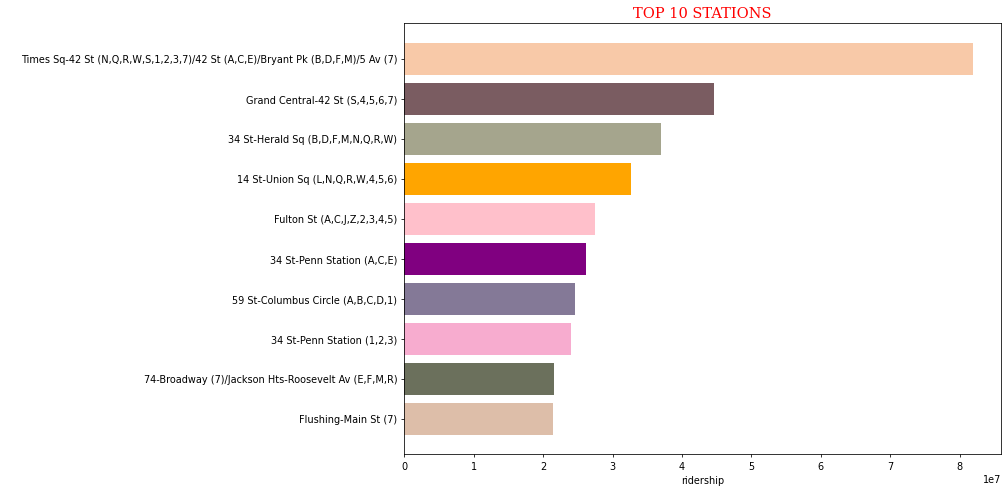

In [9]:

plt.figure(figsize=(11,8),dpi=70)
plt.barh(_stations.station_complex, _stations.ridership, color=['#f8c9a8','#7A5C61','#A5A58D','orange','pink','purple','#847997','#F7ACCF','#6B705C','#DDBEA9']);
plt.gca().invert_yaxis()
plt.xlabel("ridership")
plt.ylabel(" ")
plt.title("TOP 10 STATIONS", family='serif',fontsize = 15,loc='center',color='r')

In [10]:
_times = df.groupby('time').agg({'ridership': 'sum'}).sort_values('ridership', ascending=False).reset_index().head(10)

_times.head(10)

,time,ridership
0,17:00:00,170508023
1,16:00:00,149176294
2,08:00:00,145724091
3,18:00:00,134024041
4,15:00:00,132032697
5,07:00:00,122859183
6,14:00:00,109230143
7,09:00:00,99973399
8,13:00:00,92463002
9,19:00:00,90289417


In [11]:
#  Pandas'ta bir data frame  üzerinde doğrudan slice ile değişiklik yapmaya çalışırken uyarı verir.
# Bunu engellemek için doğru kullanımı aşağıda gösterdim (loc).
_times = (
    df.groupby("time")
    .agg({"ridership": "sum"})
    .sort_values("ridership", ascending=False)
    .reset_index()
    .head(10)
)

for i in range(len(_times)):
    current_time = _times["time"][i]

    if current_time < datetime.time(4, 0, 0):
        _times.loc[i, "time"] = "00:00 - 04:00"

    elif datetime.time(4, 0, 0) <= current_time < datetime.time(8, 0, 0):
        _times.loc[i, "time"] = "04:00 - 08:00"

    elif datetime.time(8, 0, 0) <= current_time < datetime.time(12, 0, 0):
        _times.loc[i, "time"] = "08:00 - 12:00"

    elif datetime.time(12, 0, 0) <= current_time < datetime.time(16, 0, 0):
        _times.loc[i, "time"] = "12:00 - 16:00"

    elif datetime.time(16, 0, 0) <= current_time < datetime.time(20, 0, 0):
        _times.loc[i, "time"] = "16:00 - 20:00"

    elif datetime.time(20, 0, 0) <= current_time:
        _times.loc[i, "time"] = "20:00 - 00:00"

In [12]:
_times


,time,ridership
0,16:00 - 20:00,170508023
1,16:00 - 20:00,149176294
2,08:00 - 12:00,145724091
3,16:00 - 20:00,134024041
4,12:00 - 16:00,132032697
5,04:00 - 08:00,122859183
6,12:00 - 16:00,109230143
7,08:00 - 12:00,99973399
8,12:00 - 16:00,92463002
9,16:00 - 20:00,90289417


In [19]:
_times = _times.groupby('time').agg({'ridership': 'sum'}).sort_values('ridership', ascending=False).reset_index().head(10)

_times

,time,ridership
0,16:00 - 20:00,543997775
1,12:00 - 16:00,333725842
2,08:00 - 12:00,245697490
3,04:00 - 08:00,122859183


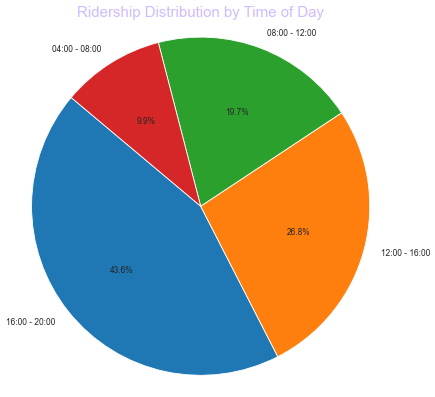

In [25]:
import matplotlib.pyplot as plt

# Assuming you already have the _times DataFrame

# Create a pie chart
plt.figure(figsize=(8, 8), dpi=60)
plt.pie(_times['ridership'], labels=_times['time'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Ridership Distribution by Time of Day", fontsize=18, color="m")

plt.show()



In [15]:
_weekdays = df.groupby('dayname').agg({'ridership': 'sum'}).sort_values('ridership', ascending=False).reset_index().head(10)
_weekdays

,dayname,ridership
0,Wednesday,309742489
1,Thursday,306980566
2,Tuesday,305285797
3,Friday,286202958
4,Monday,263878242
5,Saturday,191262553
6,Sunday,152444723


/Users/yusufsutcu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yusufsutcu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


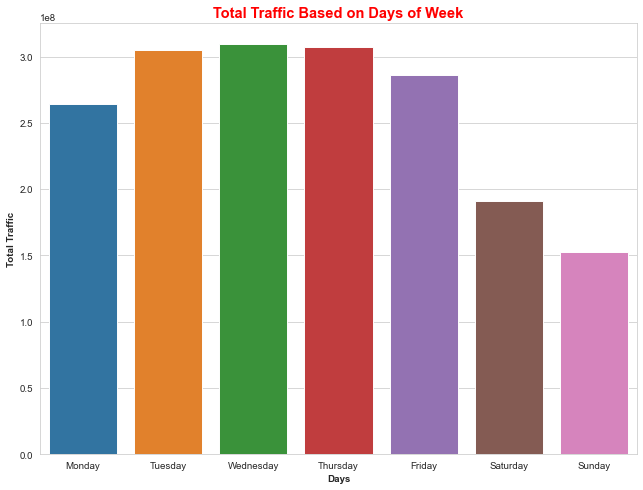

In [16]:

#Barplot for total traffic

# Style bu şekilde değiştirilebilir
sns.set_style("whitegrid")


plt.figure(figsize=(11,8),dpi=70)

ax = sns.barplot(data=_weekdays, x="dayname", y="ridership", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
sns.set_color_codes('pastel')
plt.title("Total Traffic Based on Days of Week", weight="bold", c="red", fontsize=15)
plt.xlabel("Days",weight= "bold")
plt.ylabel("Total Traffic",weight= "bold")

# Bu kadar yüksek değerler yok bu görünmemesini sağlıyordu yorum satırı yaptım. Silebilir siniz.
# plt.ylim(0,9000000000)

plt.show()
